<a href="https://colab.research.google.com/github/jewoolee0502/ComputerVision/blob/main/ECSE415_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECSE 415: Introduction to Computer Vision


##Assignment 1: Image Filtering

###Library Requirements

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Path

In [ ]:
img_path = '/content/drive/MyDrive/McGill/2025/Fall 2025/ECSE 415/A1/smoothie.png'

###1. Image Basics

####1.1 Import and document your image

Image height: 1500
Image width: 1500
Image channels: 3


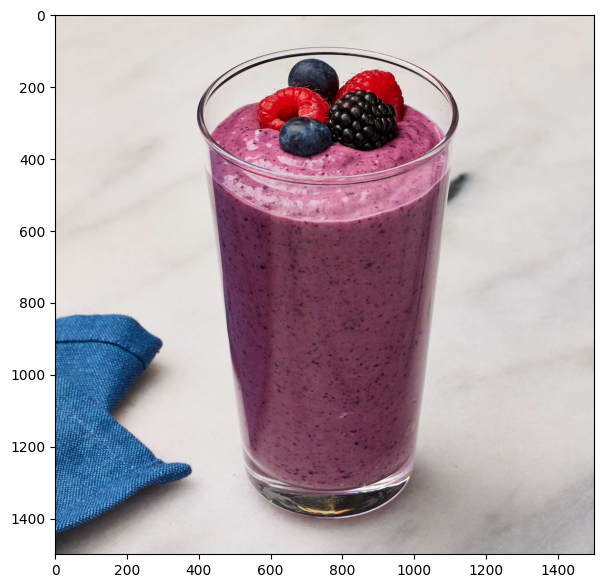

In [ ]:
img = cv2.imread(img_path)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))
plt.imshow(img_color)

height, width, channels = np.shape(img)
print("Image height:", height)
print("Image width:", width)
print("Image channels:", channels)

*For my image: smoothie.png

| Index | Dimension | Value |
|-------|-----------|-------|
|   0   |   Height  |  1500 |
|   1   |   Width   |  1500 |
|   2   |  Channel  |   3   |

####1.2  Implement grayscale conversion from scratch

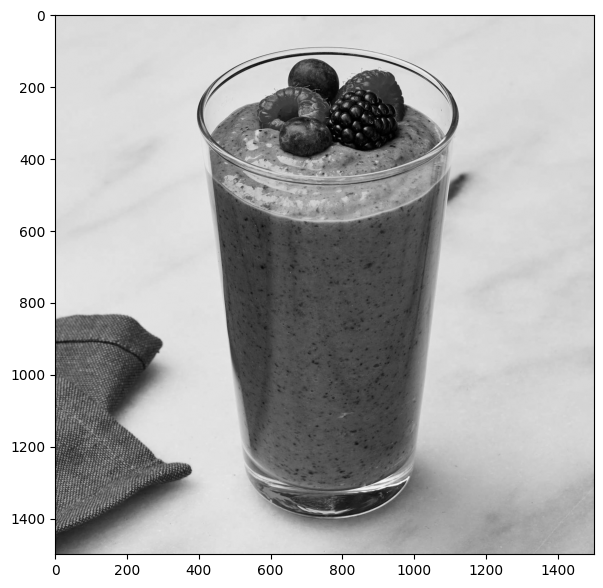

In [ ]:
# Grayscale Conversion Function
def to_grayscale(img):
  if img.ndim != 3:
    return ValueError("Input image must be 3-dimensional")

  original_dtype = img.dtype
  img = img.astype(np.float32)

  # normalizing the values: [0, 1] float
  if original_dtype == np.uint8 or img.max() > 1.0:
    img /= 255.0

  # Luminance-weighted formula: Y = 0.299 R + 0.587 G + 0.114 B
  img_gray = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]

  if original_dtype == np.uint8:
    return (img_gray * 255.0).astype(np.uint8) # reverting back to original
  else:
    return img_gray

img_gray = to_grayscale(img_color)

plt.figure(figsize=(7,7))
plt.imshow(img_gray, cmap='gray')

####1.3 Resize your image

Gray Image height: 1500
Gray Image width: 1500
Resized Image height: 512
Resized Image width: 512


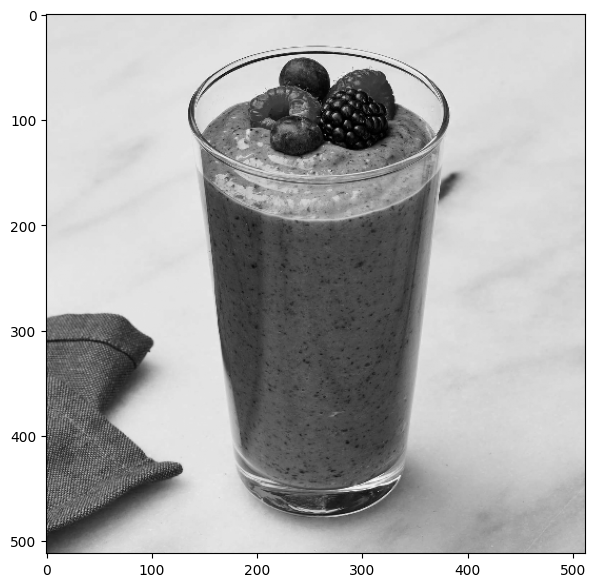

In [ ]:
def resize_img(img):
  max_dim = 512
  H,W = img.shape[:2]

  # calculating the ratio
  if H > W:
    scale = max_dim / H
  else:
    scale = max_dim / W

  new_H = int(np.round(H * scale))
  new_W = int(np.round(W * scale))

  return cv2.resize(img, (new_W, new_H))

img_resized = resize_img(img_gray)

plt.figure(figsize=(7,7))
plt.imshow(img_resized, cmap='gray')

height_gray, width_gray = img_gray.shape
height_resized, width_resized = img_resized.shape
print("Gray Image height:", height_gray)
print("Gray Image width:", width_gray)
print("Resized Image height:", height_resized)
print("Resized Image width:", width_resized)

*For my image: smoothie.png

| Label | Gray | Resized |
|-------|-----------|-------|
|   Height   |   1500  |  512 |
|   Width   |   1500   |  512 |

####1.4 Display results

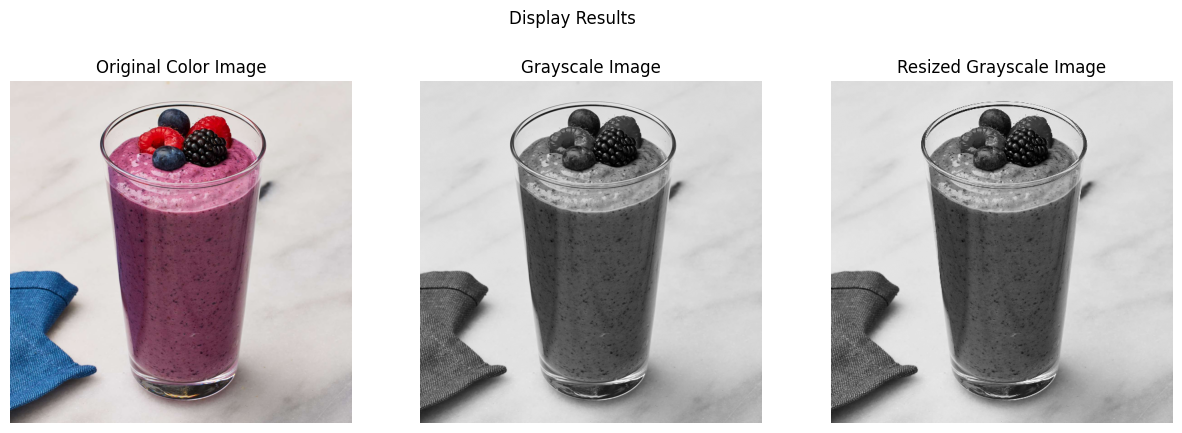

In [ ]:
# Displaying 3 images side by side
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Display Results")

axes[0].imshow(img_color)
axes[0].set_title("Original Color Image")
axes[0].axis("off")

axes[1].imshow(img_gray, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

axes[2].imshow(img_resized, cmap='gray')
axes[2].set_title("Resized Grayscale Image")
axes[2].axis("off")

plt.show()

###2. Image Filtering

####2.1 Use your grayscale image from Part 1 as input

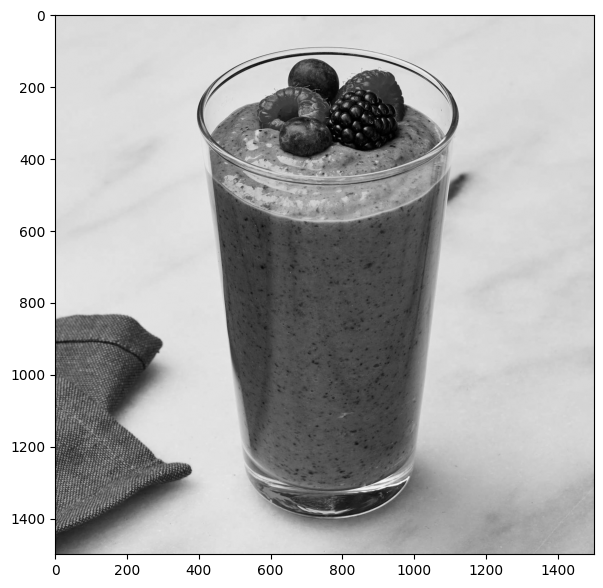

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(img_gray, cmap='gray')

####2.2 Implement Gaussian Filtering

In [ ]:
def gaussian_kernel(size, sigma):
  kernel = np.zeros((size, size))

####2.3 Implement Median Filtering

####2.4 Design Your Own Filter Kernel

###3. Discussion